In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [5]:
data = pd.DataFrame(data, label, columns=columns)

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
# k-Means

# Data Pre-Processing

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
data.shape # 13D data... need to reduce the dimention

(178, 13)

In [13]:
# PCA (Reduce Dimention)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # change from 13D -> 2D
data = pca.fit_transform(data)


In [14]:
data

array([[-7.06335756e-01, -2.53192753e-01],
       [-4.84976802e-01, -8.82289142e-03],
       [-5.21172266e-01, -1.89187222e-01],
       [-8.21643663e-01, -5.80905512e-01],
       [-2.02546382e-01, -5.94665740e-02],
       [-6.08190152e-01, -4.87519191e-01],
       [-5.44047399e-01, -3.00196497e-01],
       [-4.74357495e-01, -2.98197021e-01],
       [-5.00432012e-01, -3.07602859e-01],
       [-6.27517969e-01, -2.06328233e-01],
       [-7.27467157e-01, -3.56512044e-01],
       [-3.74967744e-01, -2.25424535e-01],
       [-4.48188283e-01, -2.31938139e-01],
       [-6.26345329e-01, -3.55138677e-01],
       [-8.35717011e-01, -5.38047802e-01],
       [-4.71931568e-01, -3.37405385e-01],
       [-4.26990905e-01, -4.50842684e-01],
       [-3.66595704e-01, -3.15750341e-01],
       [-7.18788533e-01, -5.93881332e-01],
       [-4.58884986e-01, -1.75782240e-01],
       [-6.61852288e-01, -1.27831032e-01],
       [-2.67900032e-01,  9.81127565e-03],
       [-5.99782399e-01,  7.82494523e-04],
       [-4.

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) # need to determine the number of the cluster


In [16]:
km.fit(data)

KMeans(n_clusters=3)

In [17]:
cluster = km.predict(data)

In [18]:
type(cluster)

numpy.ndarray

In [19]:
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

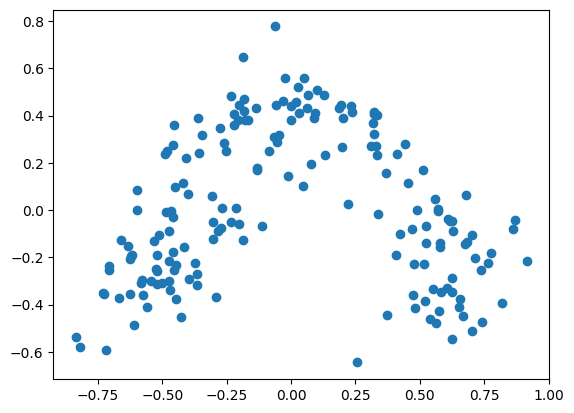

In [23]:
# Data Visualization
# From Wine Data(13D) -> transfer into 2D -> train with the transfered data -> visualization
plt.scatter(data[:,0],data[:,1]) 

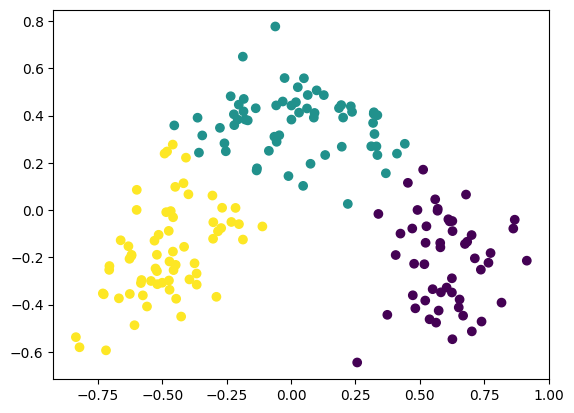

In [25]:
plt.scatter(data[:,0],data[:,1],c=cluster) # coloring according to cluster(trained) value

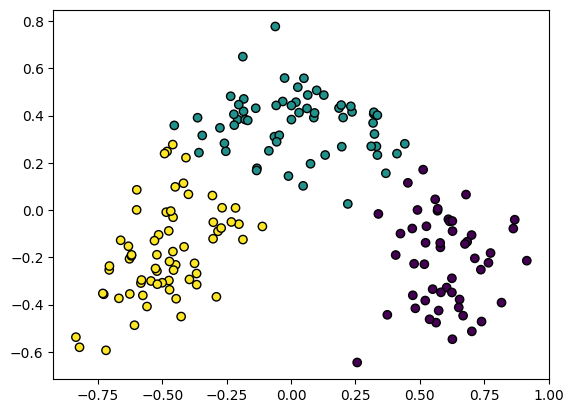

In [26]:
# Add more features to the graph
plt.scatter(data[:,0],data[:,1],c=cluster, edgecolor='black', linewidths=1)